# Quantum Annealing

## Introduction

As it was mentioned above, our goal was to optimize the portfolio by means of minimizing the risk and maximizing the income. It can be formulated as minimizing the quadratic unconstrained binary optimization (QUBO) problem, naimely minimizing the expression

$E = -\sum_i^Nh_iq_i + \sum_{i<j}^Nq_iq_jJ_{ij}$, where $q_i={\pm1}$

A very intuitive approach is to use quantum annealing since it provides the exactly the same form Hamiltonian as the stated problem requires. It adiabatically changes the Hamiltonian of the system in such a way that the final state is a ground state of the target Hamiltonian. The concept of quantum annealing is described in all the details on the D-Wave resources: https://www.dwavesys.com/, https://docs.dwavesys.com/docs/latest/index.html, https://www.youtube.com/@dwavesystems

Luckily for us D-Wave platform provides special tools that may come in handy while solving QUBO problems. Moreover generous developers give a free minute of hardware computations hence we were able not only to simulate the annealing but also to run it on a real device.

## Classical simulation

Our problem has to main parameters: $h$ - an array of stock weights and $J$ - covariance matrix

In [2]:
import numpy as np

h = -np.array([0.002604436005845128, 0.0001475925102276803, 0.00027610744514037285, 0.0009531352190088845, 0.0008832730418414711, 0.0005514854135555177, 0.00036824724562903213, 0.0007795499217198617, 0.0010928987465737147, 0.0005110770116494802])
J = np.array([[0.00032046046738773236, 2.9170726800890566e-05, 4.794455109070797e-05, 1.743194222284266e-05, 4.396621124520363e-05, 5.580537021872531e-05, 4.819681199885957e-05, 2.360712380745998e-05, 4.9583783787242055e-05, 2.4848893910628197e-05],
[2.9170726800890566e-05, 5.518250394454241e-05, 3.8806268993469535e-05, 1.7251409891672705e-05, 2.6771444211360497e-05, 2.3527246116971536e-05, 1.8676009091018325e-05, 1.8035176537351594e-05, 3.0913523658249386e-05, 1.632152003270879e-05],
[4.794455109070797e-05, 3.8806268993469535e-05, 8.180208036570616e-05, 1.828037765705621e-05, 2.4329766900505015e-05, 3.109377385312019e-05, 2.7568321236511164e-05, 1.9348697120987928e-05, 3.5751538282575865e-05, 2.004294471810628e-05],
[1.743194222284266e-05, 1.7251409891672705e-05, 1.828037765705621e-05, 4.793731174059693e-05, 1.2446104022834137e-05, 1.9071729679101816e-05, 1.7672868206903787e-05, 3.509184475515416e-05, 2.0135676427363255e-05, 3.307663785139458e-05],
[4.396621124520363e-05, 2.6771444211360497e-05, 2.4329766900505015e-05, 1.2446104022834137e-05, 9.123253763409188e-05, 2.6427424441009536e-05, 1.7149641051083732e-05, 1.0915167979545485e-05, 2.5661130513084227e-05, 1.2722563077307526e-05],
[5.580537021872531e-05, 2.3527246116971536e-05, 3.109377385312019e-05, 1.9071729679101816e-05, 2.6427424441009536e-05, 5.385214180747792e-05, 3.4948035197358135e-05, 2.0968991233564606e-05, 3.772708295933949e-05, 2.0513966060119692e-05],
[4.819681199885957e-05, 1.8676009091018325e-05, 2.7568321236511164e-05, 1.7672868206903787e-05, 1.7149641051083732e-05, 3.4948035197358135e-05, 5.5854269912009204e-05, 1.802057800501208e-05, 3.632726388287251e-05, 1.8630759753540577e-05],
[2.360712380745998e-05, 1.8035176537351594e-05, 1.9348697120987928e-05, 3.509184475515416e-05, 1.0915167979545485e-05, 2.0968991233564606e-05, 1.802057800501208e-05, 4.3121136886459995e-05, 2.1803859656732146e-05, 3.3751971619564626e-05],
[4.9583783787242055e-05, 3.0913523658249386e-05, 3.5751538282575865e-05, 2.0135676427363255e-05, 2.5661130513084227e-05, 3.772708295933949e-05, 3.632726388287251e-05, 2.1803859656732146e-05, 8.224767523212344e-05, 2.3415689187458213e-05],
[2.4848893910628197e-05, 1.632152003270879e-05, 2.004294471810628e-05, 3.307663785139458e-05, 1.2722563077307526e-05, 2.0513966060119692e-05, 1.8630759753540577e-05, 3.3751971619564626e-05, 2.3415689187458213e-05, 4.497062771499336e-05]])

In order to find the exact solution, we'll use the __Ocean__ software.

In [3]:
import dimod
import neal 

linear = {}
for i in range(10):
    linear[i+1] = h[i]
    
quadratic = {}
for i in range(10):
    for j in range(i):
        quadratic[(j+1,i+1)] =2*J[i,j]
        
offset = 0.0
vartype = dimod.SPIN

bqm = dimod.BinaryQuadraticModel(linear, quadratic, offset, vartype)
sampler = neal.SimulatedAnnealingSampler()
sample_set = sampler.sample(bqm)
print("Using SimulatedAnnlearingSampler()")
print(sample_set)

Using SimulatedAnnlearingSampler()
   1  2  3  4  5  6  7  8  9 10    energy num_oc.
0 +1 -1 -1 +1 +1 +1 +1 +1 +1 +1 -0.006533       1
['SPIN', 1 rows, 1 samples, 10 variables]


This result was proven to be optimal by enumerating all the possible permutations. Note however that the energy value is different from the true one by term ```sum(np.diag(J))```.

## Hardware run

We were using state of the art D-Wave superconducting processor _Advantage_. The result can be obtained via changing the sampler and performing minor-embedding. 

In [ ]:
from dwave.system import DWaveSampler, EmbeddingComposite

sampler = EmbeddingComposite(DWaveSampler(solver=dict(qpu=True)))

The computations were carried out on the _Leap_ IDE. The result is 2000 samples with corresponding eneregies and configurations.

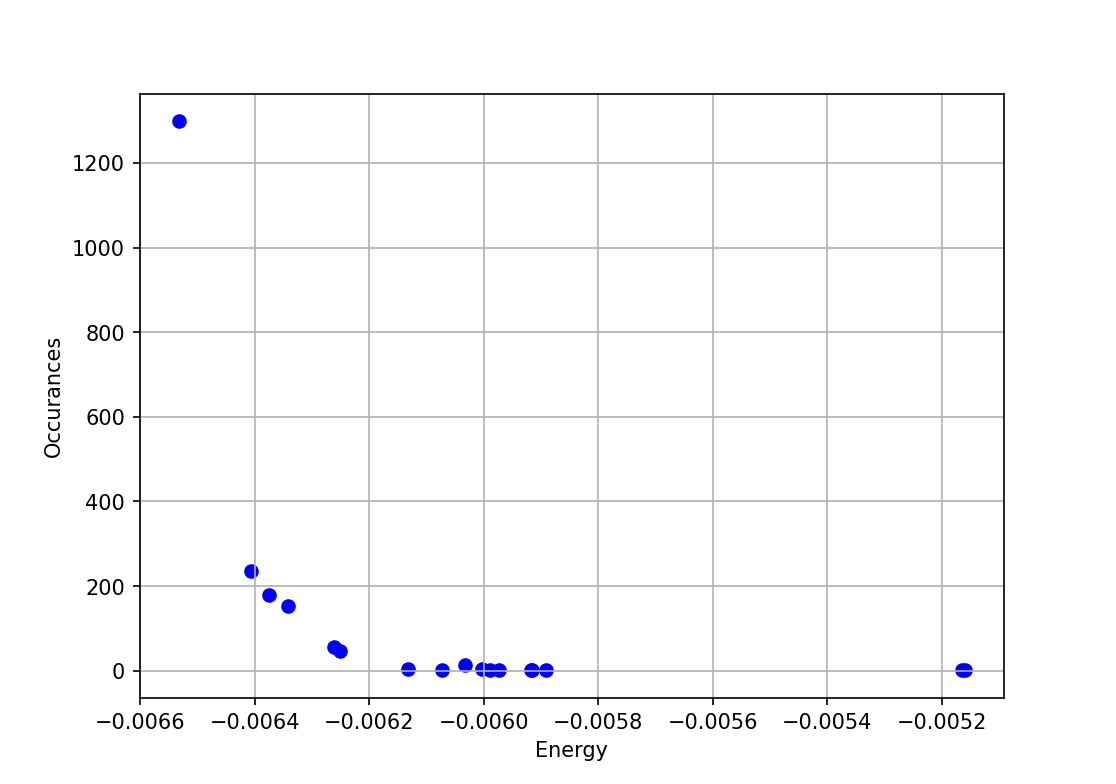

In the above figure one can see that the solution occurs more frequently than other samples. Hence the hardware sampler carries out the task correctly